# Jupyter Notebook to demonstrate the working of a LogisticRegression Classifier using the Scikit-learn Python library.

<b>Necessary libraries</b> <br>

<b>pandas</b> - Data preparation and exploratory analysis <br>
<b>numpy</b> - Numerical analysis <br>
<b>matplotlib and seaborn</b> - Data Visualization <br>
<b>sklearn </b>- Classification model building and prediction <br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings('ignore')

The datset is downloaded from UCI Machine learning repository.<br>

The datset is about directing marketing i.e phone calls from  banking institution. <br>

We will use this dataset to build a classification model for the banking insitution which will be able to predict whether the client will subscribe to a term deposit or not. <br>

We will make of the LogisticRegression classifier to build the model and preform the prediction


## Step 1: Data Preparation and EDA

In [3]:
dataset_url = 'https://raw.githubusercontent.com/katariyj/Predicting-Term-Deposit-/master/bank-additional-full.csv'
client_data = pd.read_csv(dataset_url, delimiter=';')

Let's check the head and tail of the datset to make sure we have the full dataframe

In [4]:
client_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [80]:
client_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [81]:
client_data.shape

(41188, 21)

The dataframe has <b>41188 Observations</b> and <b>21 Variables</b>

In [82]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

<b>Input variables:</b>
<br>
1 - <b>age </b> (numeric) <br>
2 - <b>job :</b> type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - <b>marital :</b> marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)<br>
4 - <b>education </b> (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')<br>
5 - <b>default: </b> has credit in default? (categorical: 'no','yes','unknown')<br>
6 - <b>housing: </b> has housing loan? (categorical: 'no','yes','unknown')<br>
7 - <b>loan: </b> has personal loan? (categorical: 'no','yes','unknown')<br>
<br>
related with the last contact of the current campaign:<br>
8 - <b>contact: </b> contact communication type (categorical: 'cellular','telephone') <br>
9 - <b>month: </b> last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')<br>
10 - <b>day_of_week: </b> last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
11 - <b>duration: </b>last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
<br>
other attributes: <br>
12 - <b>campaign: </b>number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
13 - <b>pdays: </b>number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)<br>
14 - <b>previous: </b>number of contacts performed before this campaign and for this client (numeric)<br>
15 - <b>poutcome: </b>outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')<br>
<br>
social and economic context attributes: <br>
16 - <b>emp.var.rate: </b> employment variation rate - quarterly indicator (numeric)<br>
17 - <b>cons.price.idx: </b>consumer price index - monthly indicator (numeric)<br>
18 - <b>cons.conf.idx: </b>consumer confidence index - monthly indicator (numeric)<br>
19 - <b>euribor3m: </b>euribor 3 month rate - daily indicator (numeric)<br>
20 - <b>nr.employed: </b>number of employees - quarterly indicator (numeric)<br>

<br>
<b>Output variable:</b>
21 - <b>y</b> - has the client subscribed a term deposit? (binary: 'yes','no')<br>

In [83]:
client_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Check for missing values in the variables

In [84]:
client_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [85]:
client_data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [86]:
client_data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

There are <b>36548 No's</b> and <b>4640 Yes's</b> in <b>y</b>

In [87]:
client_data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


<ul>
<li> Average age of customers who bought the term deposit is higher the customers who did not buy the term deposit</li>
<li> Campaigns are lower for the customers who bought it </li>
<li> pdays is more for customers who did not buy the term deposit</li>
</ul>

In [88]:
client_data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


## Step 2: Data Visualization

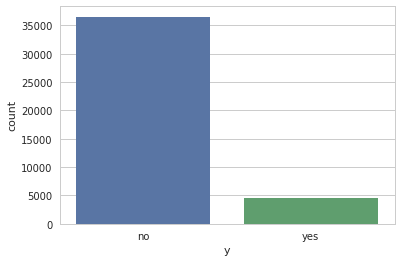

In [89]:
sns.countplot(x = 'y', data = client_data)
plt.show()

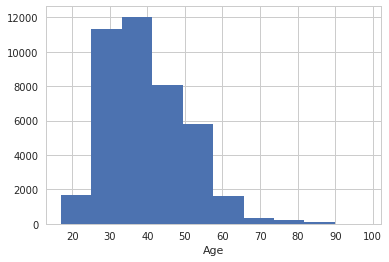

In [90]:
client_data['age'].hist()
plt.xlabel('Age')
plt.show()

In [91]:
client_data['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [92]:
client_data['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

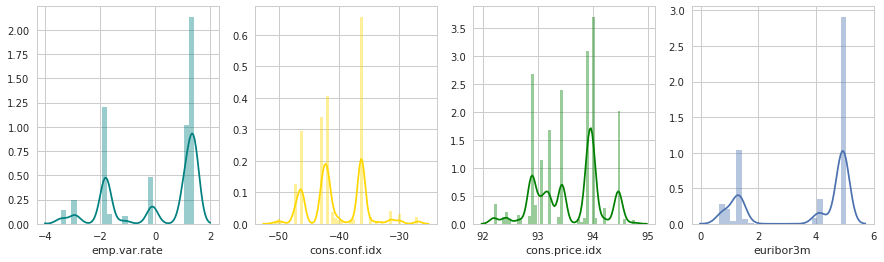

In [93]:
fig_size = (15, 4)
fig, axes = plt.subplots(ncols = 4, figsize = fig_size)
sns.distplot(client_data['emp.var.rate'], color='teal', ax = axes[0])
sns.distplot(client_data['cons.conf.idx'], color='gold', ax = axes[1])
sns.distplot(client_data['cons.price.idx'], color='green', ax = axes[2])
sns.distplot(client_data['euribor3m'], ax = axes[3])
plt.show()

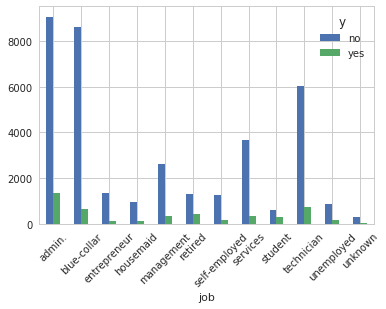

In [94]:
pd.crosstab(client_data['job'], client_data['y']).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

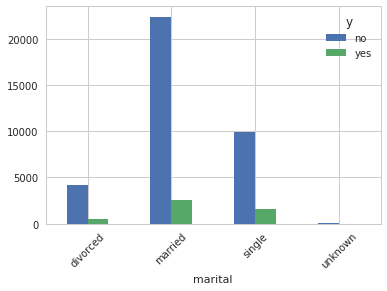

In [95]:
pd.crosstab(client_data['marital'], client_data['y']).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

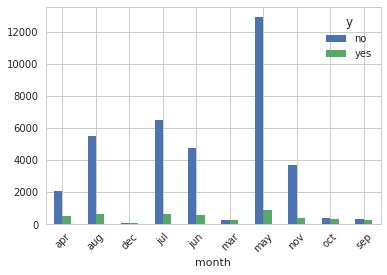

In [96]:
pd.crosstab(client_data['month'], client_data['y']).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

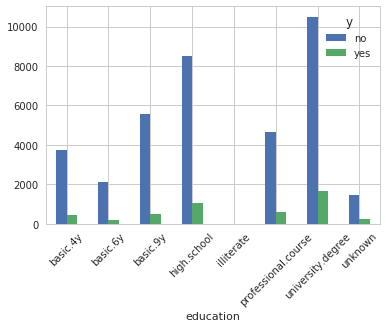

In [97]:
pd.crosstab(client_data['education'], client_data['y']).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

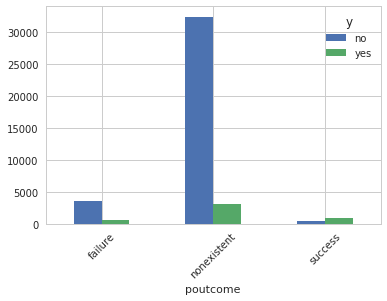

In [98]:
pd.crosstab(client_data['poutcome'], client_data['y']).plot(kind = 'bar')
plt.xticks(rotation= 45)
plt.show()

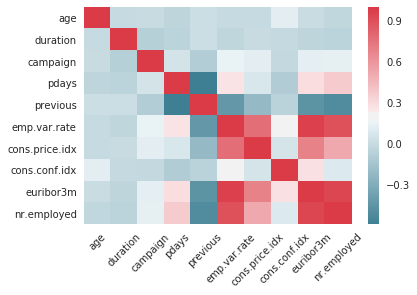

In [99]:
sns.heatmap(client_data.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.xticks(rotation= 45)
plt.show()

## Step 3: Data Preparation

We will group basic.9y, basic.4y and basic.6y and create new column basic <br>
Create dummy variables for the categorical data

In [100]:
client_data['education'] = np.where(client_data['education'] == 'basic.9y', 'basic', client_data['education'])
client_data['education'] = np.where(client_data['education'] == 'basic.4y', 'basic', client_data['education'])
client_data['education'] = np.where(client_data['education'] == 'basic.6y', 'basic', client_data['education'])

In [101]:
client_data['education'].value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [102]:
client_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [103]:
dummy_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

data_new = client_data

for cat in dummy_columns:
    dummy_cols = pd.get_dummies(client_data[cat], prefix=cat, drop_first=True)
    data_new = data_new.join(dummy_cols)
       

In [104]:
data_vars = data_new.columns.values.tolist()
to_keep = [i for i in data_vars if i not in dummy_columns]
to_keep

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'default_unknown',
 'default_yes',
 'housing_unknown',
 'housing_yes',
 'loan_unknown',
 'loan_yes',
 'contact_telephone',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent',
 'poutcome_success']

In [105]:
final_client_data = data_new[to_keep]
final_client_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [106]:
from sklearn.preprocessing import LabelEncoder
label_encoder_y = LabelEncoder()
final_client_data['y'] = label_encoder_y.fit_transform(final_client_data['y'])
final_client_data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## Step 4: Model Building

### All feature model

In [107]:
y = ['y']
X = [i for i in final_client_data.columns.values.tolist() if i not in y]

In [139]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(final_client_data[X], final_client_data[y], test_size=0.3, random_state=0)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.91


In [140]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10670   299]
 [  803   585]]


In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     10969
          1       0.66      0.42      0.51      1388

avg / total       0.90      0.91      0.90     12357



### Recursive Feature Eliminiation to select significant features

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [110]:
feature_sel_cols = RFE(logistic, 25)
feature_sel_cols = feature_sel_cols.fit(final_client_data[X], final_client_data[y])
print('Features sorted by their rank:')
sorted(zip(map(lambda X: round(X, 4), feature_sel_cols.ranking_), X))

Features sorted by their rank:


[(1, 'campaign'),
 (1, 'contact_telephone'),
 (1, 'day_of_week_mon'),
 (1, 'day_of_week_thu'),
 (1, 'day_of_week_tue'),
 (1, 'day_of_week_wed'),
 (1, 'default_unknown'),
 (1, 'education_university.degree'),
 (1, 'education_unknown'),
 (1, 'emp.var.rate'),
 (1, 'job_blue-collar'),
 (1, 'job_entrepreneur'),
 (1, 'job_retired'),
 (1, 'job_services'),
 (1, 'job_student'),
 (1, 'marital_single'),
 (1, 'month_aug'),
 (1, 'month_dec'),
 (1, 'month_jul'),
 (1, 'month_mar'),
 (1, 'month_may'),
 (1, 'month_nov'),
 (1, 'poutcome_nonexistent'),
 (1, 'poutcome_success'),
 (1, 'previous'),
 (2, 'education_professional.course'),
 (3, 'cons.conf.idx'),
 (4, 'cons.price.idx'),
 (5, 'month_jun'),
 (6, 'nr.employed'),
 (7, 'job_unemployed'),
 (8, 'loan_yes'),
 (9, 'marital_married'),
 (10, 'job_self-employed'),
 (11, 'housing_yes'),
 (12, 'job_technician'),
 (13, 'duration'),
 (14, 'housing_unknown'),
 (15, 'loan_unknown'),
 (16, 'month_sep'),
 (17, 'education_illiterate'),
 (18, 'job_housemaid'),
 (19, 

In [128]:
rfe_cols = ['contact_telephone', 'day_of_week_mon', 'day_of_week_tue', 'day_of_week_wed', 'day_of_week_thu', 'euribor3m', 'job_blue-collar', 'job_entrepreneur', 'job_self-employed', 'job_retired', 'job_services', 'job_student', 'month_aug', 'month_dec', 'month_nov', 'month_jun', 'month_jul', 'month_mar', 'month_may', 'month_sep','poutcome_success', 'previous', 'campaign']

In [129]:
rfe_X = final_client_data[rfe_cols]

In [135]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(rfe_X, final_client_data[y], test_size=0.3, random_state=0)
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.899


In [136]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[10835   134]
 [ 1123   265]]


In [137]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10969
          1       0.66      0.19      0.30      1388

avg / total       0.88      0.90      0.87     12357



## Though the accuracy, f1 score and recall is better for the all feature model it might be the case that it is overfitting. So we will select the RFE model even though the accuracy of it is slightly lesser but we can be sure that it does not overfit due to the usage of cross validation to avoid overfitting